In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Load_Image():
    Blank_Image=np.zeros((600,600))
    Font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(Blank_Image,org=(50,300),text='ABCDE',fontFace=Font,fontScale=5,color=(255,255,255),thickness=20)
    return Blank_Image

In [3]:
def Display_Image(Image):
    Fig=plt.figure(figsize=(12,10))
    Ax=Fig.add_subplot(111)
    Ax.imshow(Image,cmap='gray')

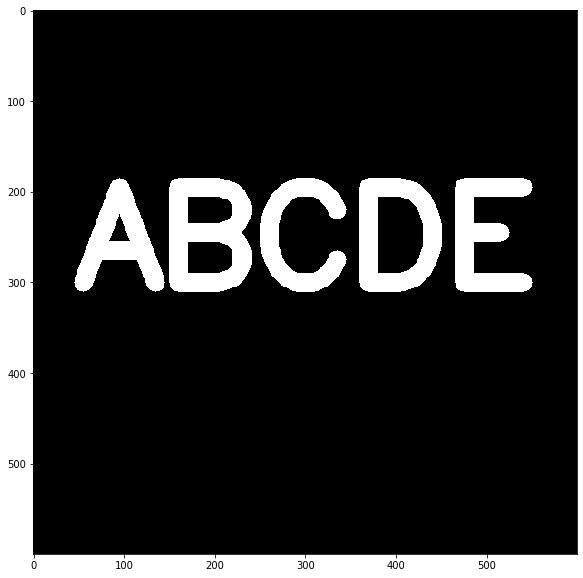

In [4]:
Image1=Load_Image()
Display_Image(Image1)

In [5]:
Kernel=np.ones((5,5),dtype=np.uint8)
Kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

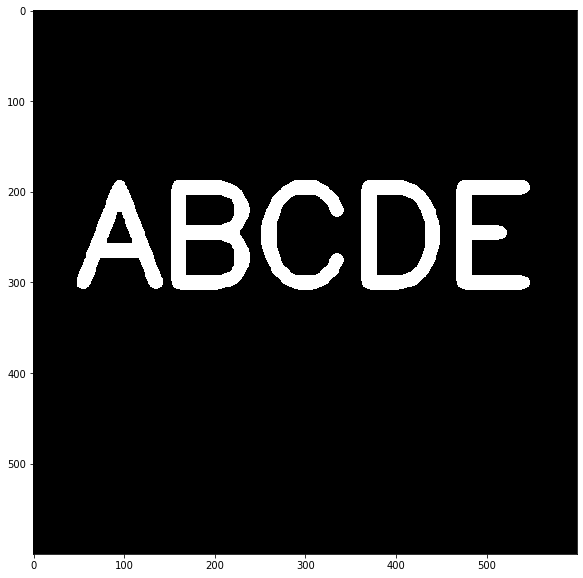

In [6]:
# EROSION:
Image2=cv2.erode(Image1,Kernel,iterations=1)
Display_Image(Image2)

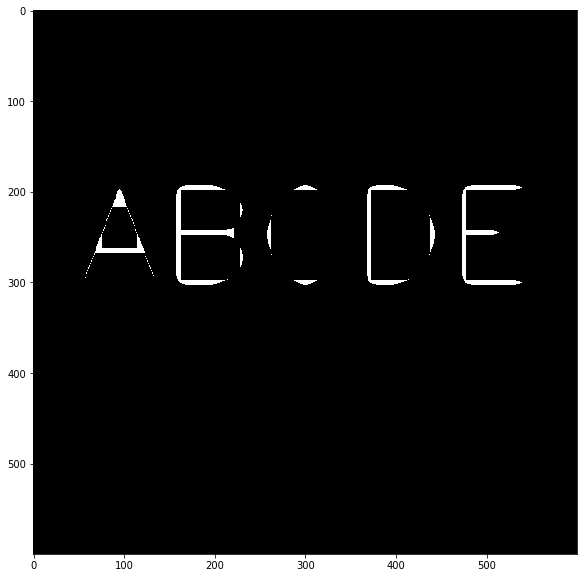

In [7]:
Image2=cv2.erode(Image1,Kernel,iterations=4)
Display_Image(Image2)

In [8]:
White_Noise=np.random.randint(low=0,high=2,size=(600,600))
White_Noise

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0]])

In [9]:
White_Noise.max()

1

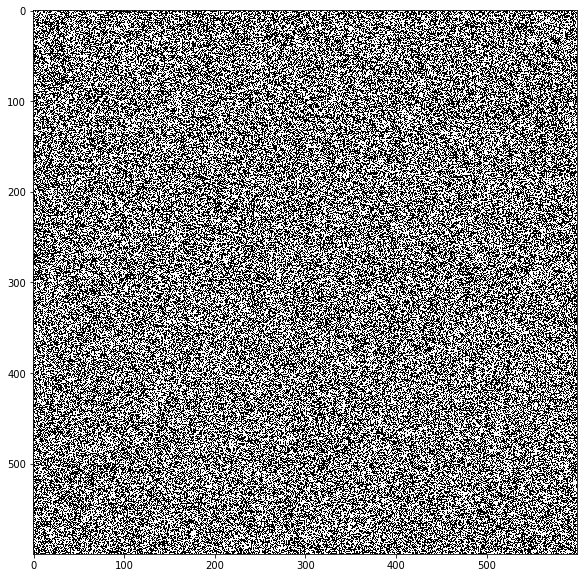

In [10]:
Display_Image(White_Noise)

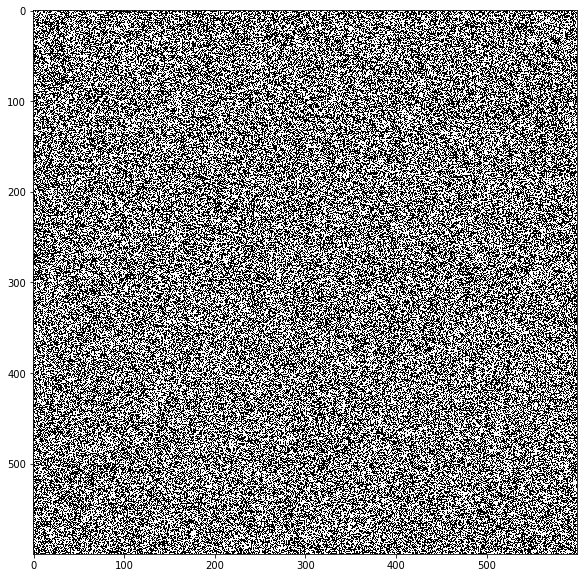

In [11]:
White_Noise=White_Noise*255
Display_Image(White_Noise)

In [12]:
Image1=Load_Image()
Noise_Image=White_Noise + Image1

In [13]:
Image1.max()

255.0

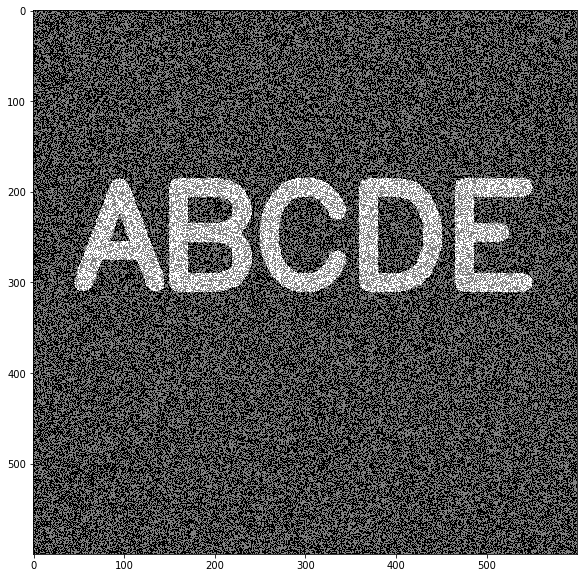

In [14]:
Display_Image(Noise_Image)

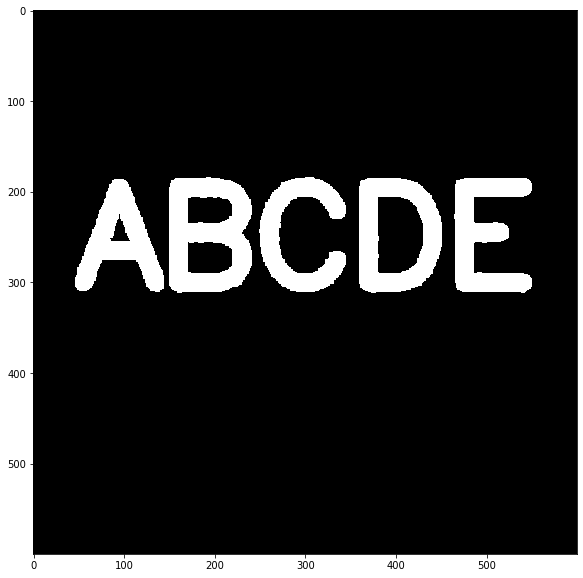

In [15]:
# OPENING:OPENING IS EROSION FOLLOWED BY DILATION,USEFUL IN REMOVAL OF BACKGROUND NOISE
Noise_Removal=cv2.morphologyEx(Noise_Image,cv2.MORPH_OPEN,Kernel)
Display_Image(Noise_Removal)

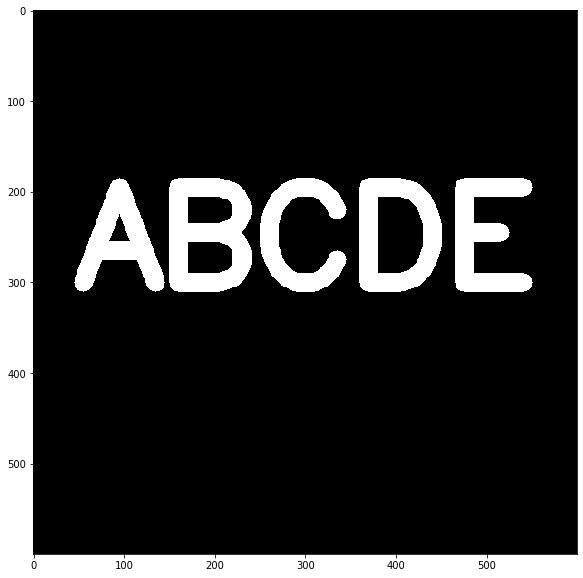

In [16]:
Display_Image(Image1)

In [17]:
Black_Noise=np.random.randint(low=0,high=2,size=(600,600))

In [18]:
Black_Noise=Black_Noise * -255
Black_Noise

array([[-255, -255, -255, ...,    0,    0,    0],
       [   0,    0, -255, ...,    0, -255,    0],
       [   0,    0, -255, ...,    0,    0,    0],
       ...,
       [   0,    0, -255, ..., -255, -255, -255],
       [   0,    0, -255, ..., -255,    0, -255],
       [   0,    0,    0, ..., -255,    0, -255]])

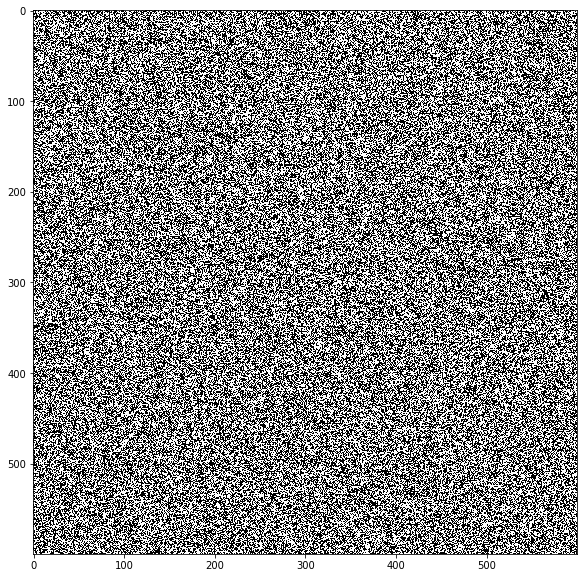

In [19]:
Display_Image(Black_Noise)

In [20]:
Black_Noise_Image=Black_Noise+Image1
Black_Noise_Image

array([[-255., -255., -255., ...,    0.,    0.,    0.],
       [   0.,    0., -255., ...,    0., -255.,    0.],
       [   0.,    0., -255., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0., -255., ..., -255., -255., -255.],
       [   0.,    0., -255., ..., -255.,    0., -255.],
       [   0.,    0.,    0., ..., -255.,    0., -255.]])

In [21]:
Black_Noise_Image[Black_Noise_Image== -255]=0

In [22]:
Black_Noise_Image.min()

0.0

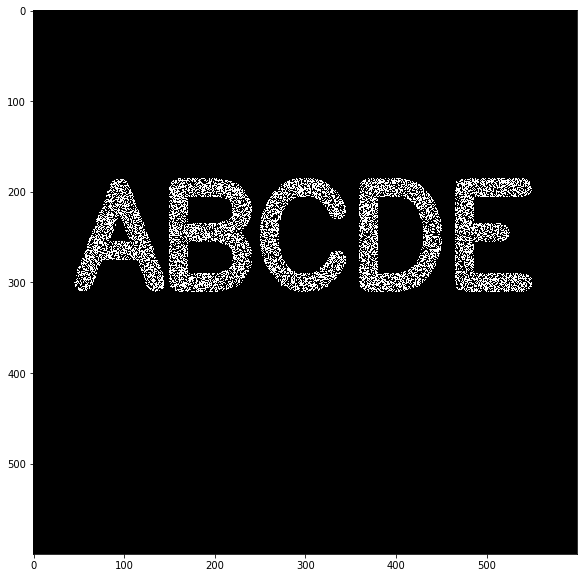

In [23]:
Display_Image(Black_Noise_Image)

In [24]:
# CLOSING:USEFUL IN REMOVAL OF FOREGROUND NOISE(BLACK DOTS ON WHITE TEXT)
Noise_Removal1=cv2.morphologyEx(Black_Noise_Image,cv2.MORPH_CLOSE,Kernel)

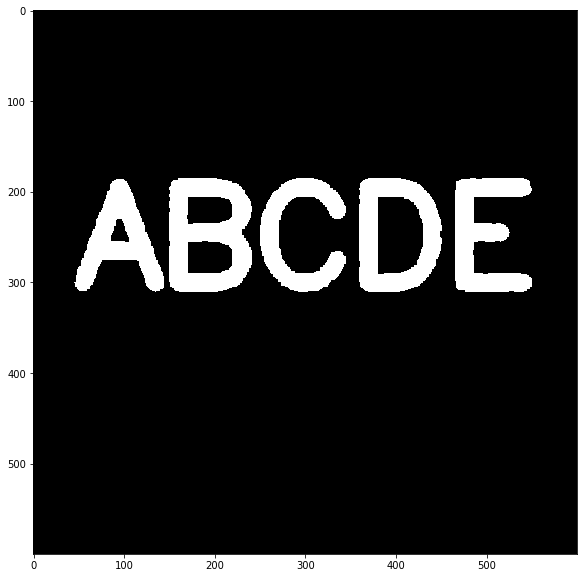

In [25]:
Display_Image(Noise_Removal1)

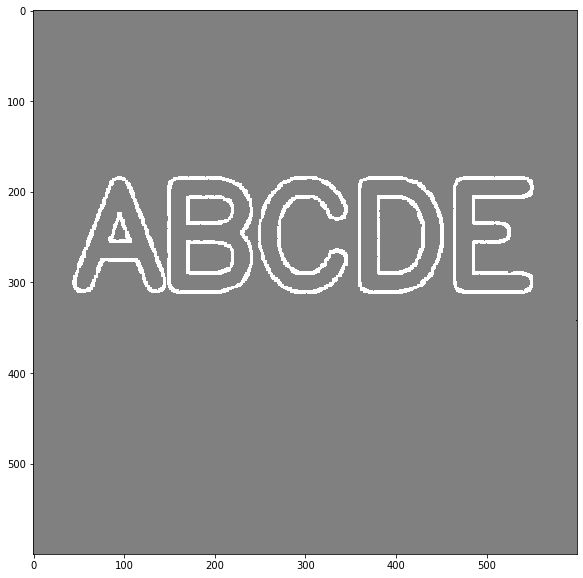

In [26]:
# MORPHOLOGICAL DILATION:DIFFERENCE BETWEEN DILATION AND EROSION OF IMAGE
Gradient=cv2.morphologyEx(Noise_Image,cv2.MORPH_GRADIENT,Kernel)
Display_Image(Gradient)